In [24]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt


In [25]:
model_pth = '/home/giacomo/Desktop/results_cl_ssl/OCL/resnet9/hypertune_iid_long_rn18wide_no_strategy_simsiam_05-18_14-16/iid_no_strategy_simsiam_cifar100_05-18_14-16'
activations_pth = os.path.join(model_pth, 'activations')

In [26]:
def get_svds(activations):
    reprs = activations.reshape(-1, activations.shape[-1])

    norms = torch.linalg.norm(reprs, dim=1)
    normed_reprs = reprs / (1e-6 + norms.unsqueeze(1))
    svds = torch.svd(normed_reprs).S
    return svds

# Task agnostic collapse

Get test activations and svds

In [27]:
test_file_list = [f for f in os.listdir(activations_pth) if f.startswith("test_activations") and f.endswith(".npy")]

# Load and concatenate the arrays
arrays = []
for file in test_file_list:
    array = np.load(os.path.join(activations_pth, file))
    arrays.append(array)

# Concatenate all activations along the first dimension
all_test_activations = torch.from_numpy(np.concatenate(arrays, axis=0))
print(all_test_activations.shape)

torch.Size([10000, 1024])


In [28]:
test_svds = get_svds(all_test_activations)
print(test_svds.shape)

torch.Size([1024])


Get val activations

In [29]:
val_file_list = [f for f in os.listdir(activations_pth) if f.startswith("val_activations") and f.endswith(".npy")]

# Load and concatenate the arrays
arrays = []
for file in val_file_list:
    array = np.load(os.path.join(activations_pth, file))
    arrays.append(array)

# Concatenate all activations along the first dimension
all_val_activations = torch.from_numpy(np.concatenate(arrays, axis=0))
print(all_val_activations.shape)

torch.Size([5000, 1024])


In [30]:
val_svds = get_svds(all_val_activations)
print(val_svds.shape)

torch.Size([1024])


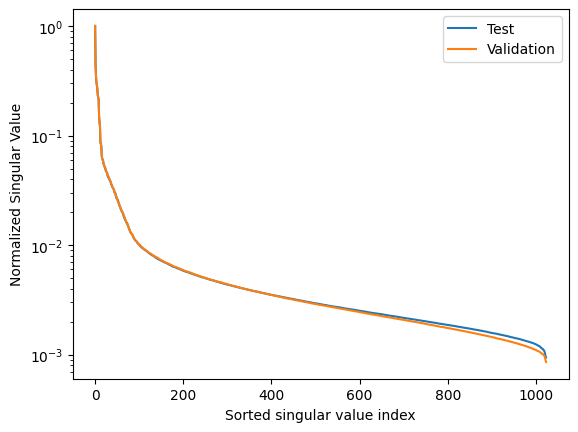

In [31]:
plt.plot(test_svds/test_svds[0], label='Test')
plt.plot(val_svds/val_svds[0], label='Validation')
plt.legend()
plt.xlabel("Sorted singular value index")
plt.ylabel('Normalized Singular Value')
plt.yscale('log')
plt.show()

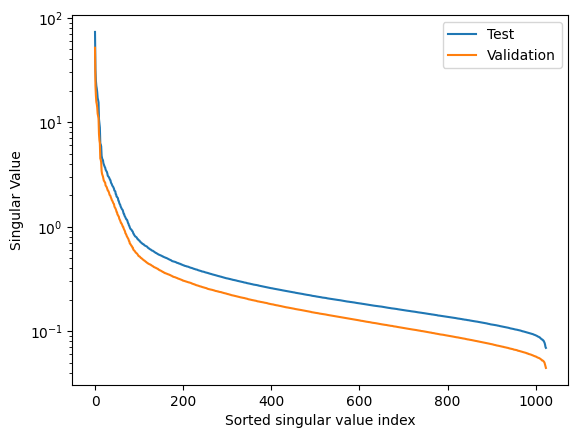

In [32]:
plt.plot(test_svds, label='Test')
plt.plot(val_svds, label='Validation')
plt.legend()
plt.xlabel("Sorted singular value index")
plt.ylabel('Singular Value')
plt.yscale('log')
plt.show()

# Task aware collapse

In [33]:
num_exps = 20

Test svds

In [34]:
test_exps_svds_list = []

for exp_idx in range(num_exps):
    array = torch.from_numpy(np.load(os.path.join(activations_pth, f'test_activations_{exp_idx}.npy')))
    test_exps_svds_list.append(get_svds(array))

Validation svds

In [35]:
val_exps_svds_list = []

for exp_idx in range(num_exps):
    array = torch.from_numpy(np.load(os.path.join(activations_pth, f'test_activations_{exp_idx}.npy')))
    val_exps_svds_list.append(get_svds(array))

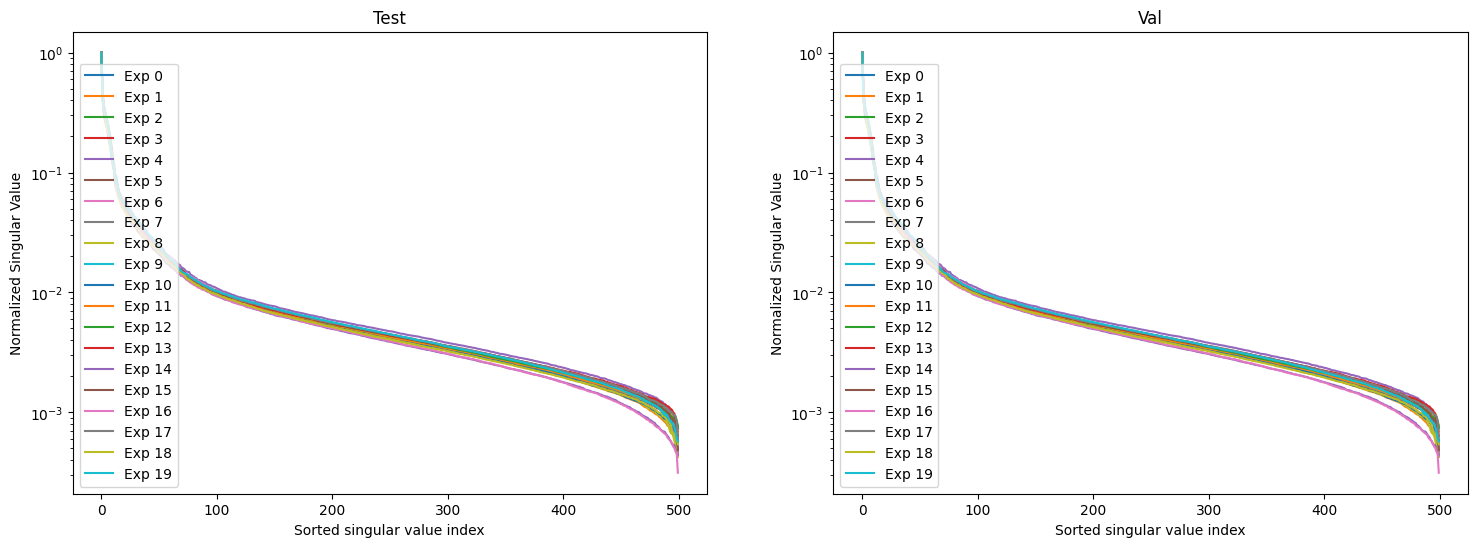

In [36]:
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
for exp_idx, svds in enumerate (test_exps_svds_list):
    plt.plot(svds/svds[0], label=f'Exp {exp_idx}')
plt.legend()
plt.xlabel("Sorted singular value index")
plt.ylabel('Normalized Singular Value')
plt.yscale('log')
plt.title('Test')

plt.subplot(1,2,2)
for exp_idx, svds in enumerate (val_exps_svds_list):
    plt.plot(svds/svds[0], label=f'Exp {exp_idx}')
plt.legend()
plt.xlabel("Sorted singular value index")
plt.ylabel('Normalized Singular Value')
plt.yscale('log')
plt.title('Val')

plt.show()

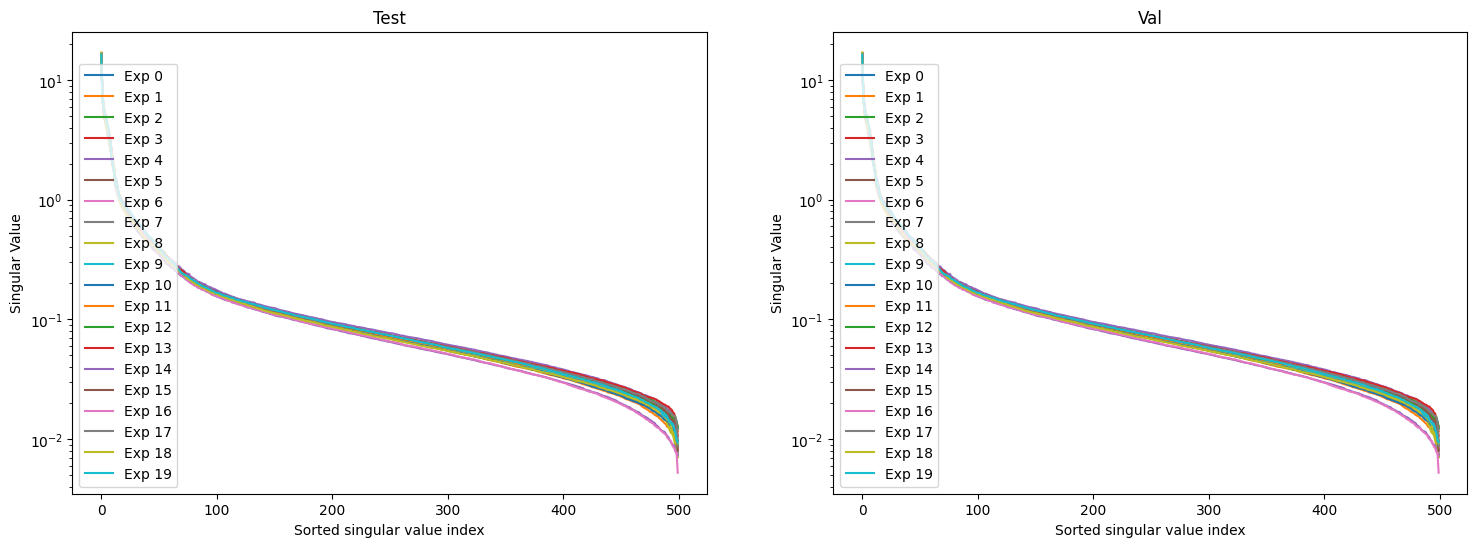

In [37]:
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
for exp_idx, svds in enumerate (test_exps_svds_list):
    plt.plot(svds, label=f'Exp {exp_idx}')
plt.legend()
plt.xlabel("Sorted singular value index")
plt.ylabel('Singular Value')
plt.yscale('log')
plt.title('Test')

plt.subplot(1,2,2)
for exp_idx, svds in enumerate (val_exps_svds_list):
    plt.plot(svds, label=f'Exp {exp_idx}')
plt.legend()
plt.xlabel("Sorted singular value index")
plt.ylabel('Singular Value')
plt.yscale('log')
plt.title('Val')

plt.show()